## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Reading Dataset

In [2]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
len(pd.unique(df['Ticket']))

681

In [6]:
len(pd.unique(df['Name']))

891

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.shape

(712, 8)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [16]:
df.Embarked.value_counts(normalize=True)

S    0.778090
C    0.182584
Q    0.039326
Name: Embarked, dtype: float64

In [17]:
df.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [18]:
df.Sex.value_counts(normalize=True)

male      0.636236
female    0.363764
Name: Sex, dtype: float64

In [19]:
# df['Age'].hist()
# plt.show()

In [20]:
# df['Fare'].hist()
# plt.show()

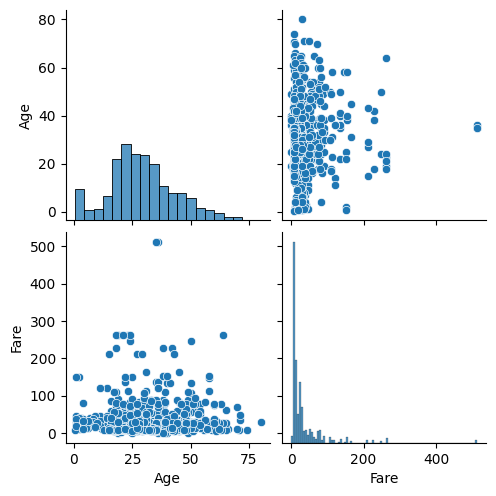

In [21]:
sns.pairplot(df, vars=['Age', 'Fare'])
plt.show()

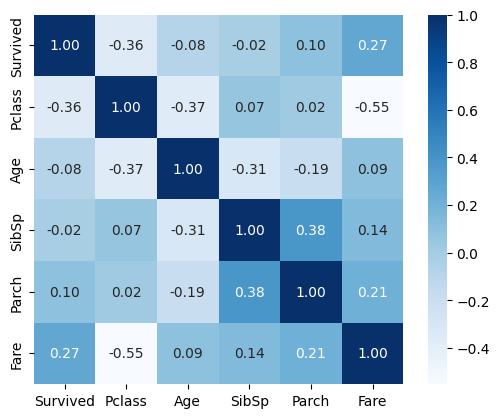

In [22]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 cmap="Blues")
plt.show()

## Feature Engineering

In [23]:
df['Family_Size']=df['SibSp']+df['Parch']

In [24]:
df['Age*Class']=df['Age']*df['Pclass']

In [25]:
df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

In [26]:
df["Male"] = np.where((df["Sex"] == "male"), 1, 0)

In [27]:
df["Embarked_S"] = np.where((df["Embarked"] == "S"), 1, 0)
df["Embarked_C"] = np.where((df["Embarked"] == "C"), 1, 0)
df["Embarked_Q"] = np.where((df["Embarked"] == "Q"), 1, 0)

In [28]:
df.drop(['Fare', 'SibSp', 'Parch', 'Sex', 'Embarked'], axis=1, inplace=True)

In [29]:
df.head()

,Survived,Pclass,Age,Family_Size,Age*Class,Fare_Per_Person,Male,Embarked_S,Embarked_C,Embarked_Q
0,0,3,22.0,1,66.0,3.62500,1,1,0,0
1,1,1,38.0,1,38.0,35.64165,0,0,1,0
2,1,3,26.0,0,78.0,7.92500,0,1,0,0
3,1,1,35.0,1,35.0,26.55000,0,1,0,0
4,0,3,35.0,0,105.0,8.05000,1,1,0,0


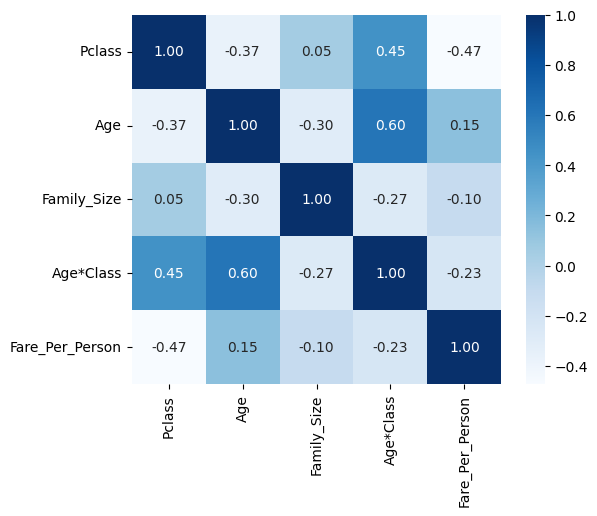

In [30]:
corrmat = df[['Pclass', 'Age', 'Family_Size', 'Age*Class', 'Fare_Per_Person']].corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 cmap="Blues")
plt.show()

In [31]:
# df["SibSp"] = np.where((df["SibSp"] > 0), 1, 0)
# df["Parch"] = np.where((df["Parch"] > 0), 1, 0)
# df["Family_Size"] = np.where((df["Family_Size"] > 0), 1, 0)
# df.Family_Size.value_counts()

## Create Train, Validate and Test Datasets

In [32]:
#creating the Y dataframe which contains the dependent variable
y=df['Survived'].values

#checking out the shape and values
print(y.shape)
print(y)

(712,)
[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 0 1 0 0 1

In [33]:
#creating the X dataframe which contains all other columns
X=df[['Male','Pclass', 'Age', 'Family_Size', 'Age*Class', 'Fare_Per_Person', 'Embarked_S', 'Embarked_C', 'Embarked_Q']]
print(X.shape)

(712, 9)


In [34]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.70, random_state=42)

In [35]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.15, random_state=42)

## Creating ML Models

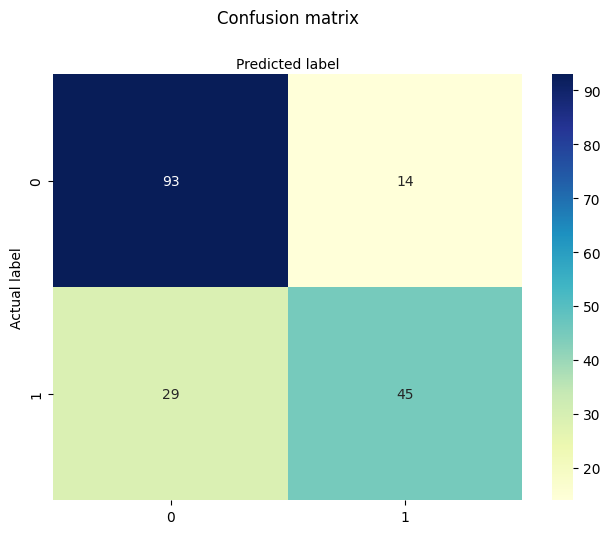

              precision    recall  f1-score   support

Not Survived       0.76      0.87      0.81       107
    Survived       0.76      0.61      0.68        74

    accuracy                           0.76       181
   macro avg       0.76      0.74      0.74       181
weighted avg       0.76      0.76      0.76       181



In [36]:
lm = linear_model.LogisticRegression(max_iter=5000, random_state=16)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

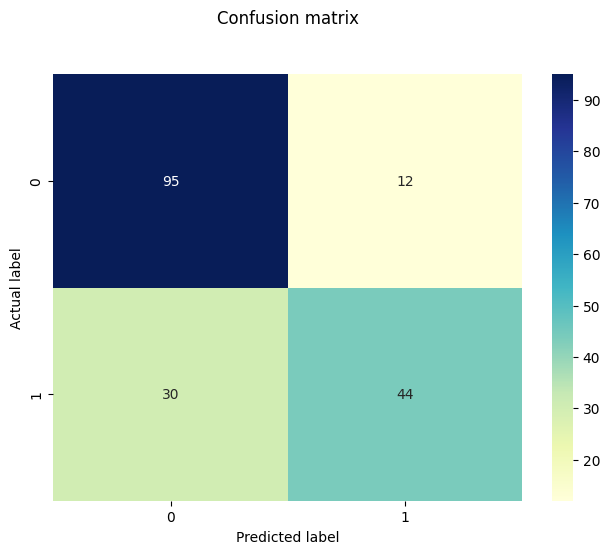

              precision    recall  f1-score   support

Not Survived       0.76      0.89      0.82       107
    Survived       0.79      0.59      0.68        74

    accuracy                           0.77       181
   macro avg       0.77      0.74      0.75       181
weighted avg       0.77      0.77      0.76       181



In [37]:
lm = linear_model.LogisticRegression(max_iter=5000, random_state=16, solver="liblinear")
lm.fit(X_train, y_train)

y_pred = lm.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

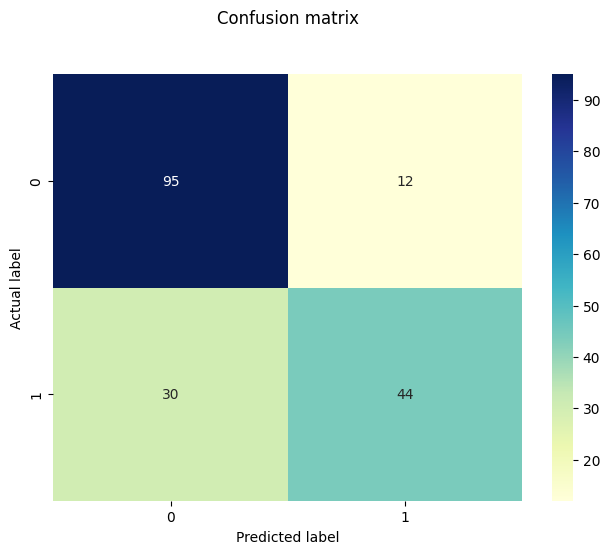

              precision    recall  f1-score   support

Not Survived       0.76      0.89      0.82       107
    Survived       0.79      0.59      0.68        74

    accuracy                           0.77       181
   macro avg       0.77      0.74      0.75       181
weighted avg       0.77      0.77      0.76       181



In [38]:
lm = linear_model.LogisticRegression(max_iter=5000, random_state=16, solver="liblinear", penalty='l2')
lm.fit(X_train, y_train)

y_pred = lm.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

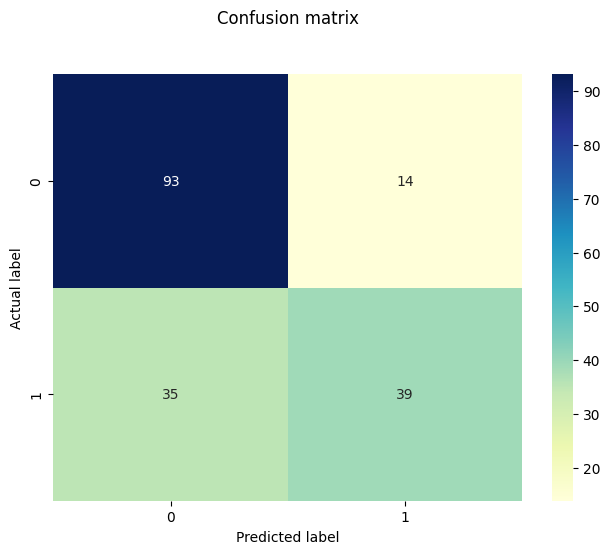

              precision    recall  f1-score   support

Not Survived       0.73      0.87      0.79       107
    Survived       0.74      0.53      0.61        74

    accuracy                           0.73       181
   macro avg       0.73      0.70      0.70       181
weighted avg       0.73      0.73      0.72       181



In [39]:
#Decision Tree Classifier
treeModel = DecisionTreeClassifier(random_state=0, max_depth=8, criterion='entropy')
treeModel.fit(X_train, y_train)

y_pred = treeModel.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

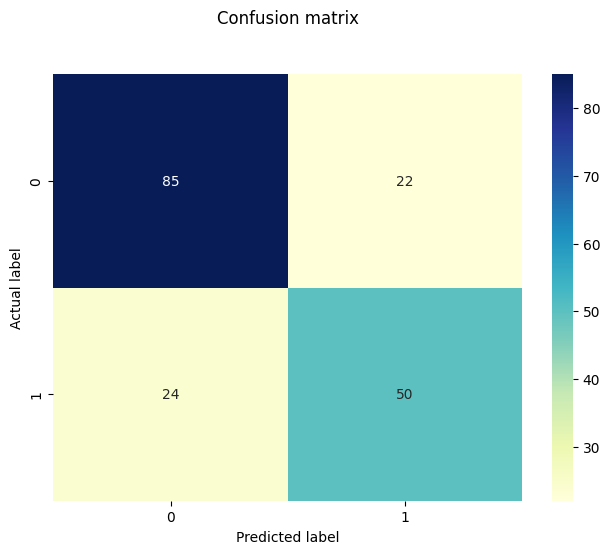

              precision    recall  f1-score   support

Not Survived       0.78      0.79      0.79       107
    Survived       0.69      0.68      0.68        74

    accuracy                           0.75       181
   macro avg       0.74      0.74      0.74       181
weighted avg       0.74      0.75      0.75       181



In [40]:
#Random Forest Classifier
forestModel = RandomForestClassifier(random_state=42, n_jobs=4, max_depth= 12)
forestModel.fit(X_train, y_train)

y_pred = forestModel.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

[17:24:40] WARNING: /Users/ktietz/demo/mc3/conda-bld/xgboost-split_1628682908089/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


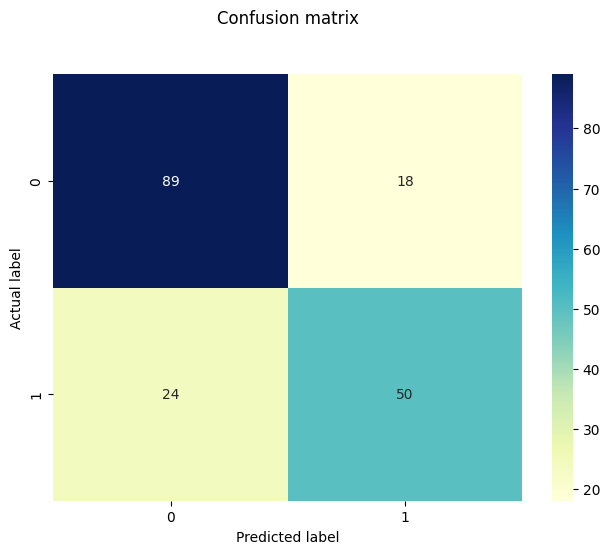

              precision    recall  f1-score   support

Not Survived       0.79      0.83      0.81       107
    Survived       0.74      0.68      0.70        74

    accuracy                           0.77       181
   macro avg       0.76      0.75      0.76       181
weighted avg       0.77      0.77      0.77       181



In [41]:
#XG Boost Classifier
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

y_pred = xgb_cl.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

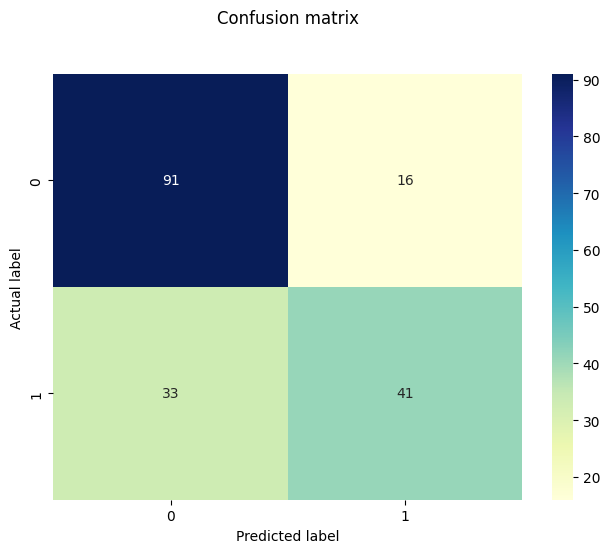

              precision    recall  f1-score   support

Not Survived       0.73      0.85      0.79       107
    Survived       0.72      0.55      0.63        74

    accuracy                           0.73       181
   macro avg       0.73      0.70      0.71       181
weighted avg       0.73      0.73      0.72       181



In [42]:
#Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

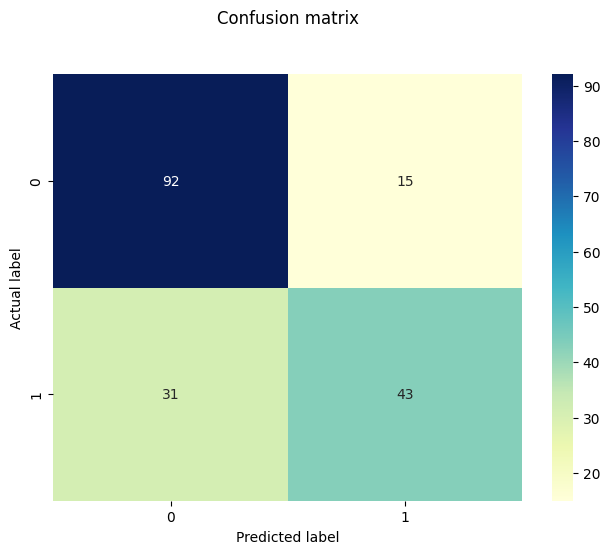

              precision    recall  f1-score   support

Not Survived       0.75      0.86      0.80       107
    Survived       0.74      0.58      0.65        74

    accuracy                           0.75       181
   macro avg       0.74      0.72      0.73       181
weighted avg       0.75      0.75      0.74       181



In [43]:
#SVM Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_valid, y_pred, target_names=target_names))

## Testing the best model - XGBOOST

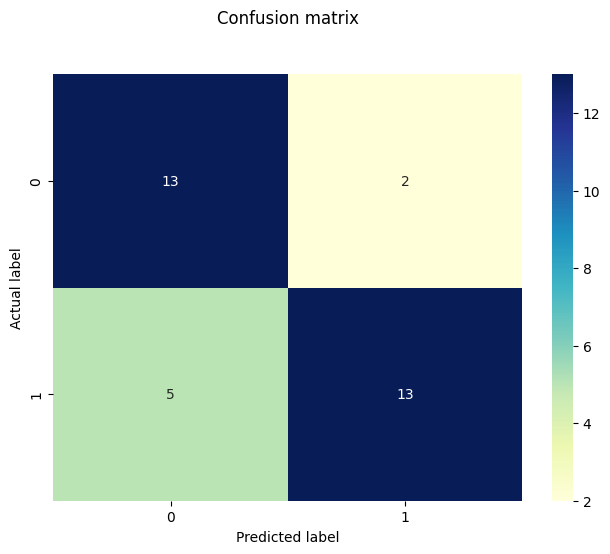

              precision    recall  f1-score   support

Not Survived       0.72      0.87      0.79        15
    Survived       0.87      0.72      0.79        18

    accuracy                           0.79        33
   macro avg       0.79      0.79      0.79        33
weighted avg       0.80      0.79      0.79        33



In [44]:
#XG Boost Classifier on Test data
y_pred = xgb_cl.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Text(0.5,257.44,'Predicted label');

target_names = ['Not Survived', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

In [45]:
test_data = pd.read_csv("test.csv")

In [46]:
test_data['Family_Size']=test_data['SibSp']+test_data['Parch']
test_data['Age*Class']=test_data['Age']*test_data['Pclass']
test_data['Fare_Per_Person']=test_data['Fare']/(test_data['Family_Size']+1)
test_data["Male"] = np.where((test_data["Sex"] == "male"), 1, 0)
test_data["Embarked_S"] = np.where((test_data["Embarked"] == "S"), 1, 0)
test_data["Embarked_C"] = np.where((test_data["Embarked"] == "C"), 1, 0)
test_data["Embarked_Q"] = np.where((test_data["Embarked"] == "Q"), 1, 0)
test_data.drop(['Fare', 'SibSp', 'Parch', 'Sex', 'Embarked'], axis=1, inplace=True)

In [47]:
test_data.head()

,PassengerId,Pclass,Name,Age,Ticket,Cabin,Family_Size,Age*Class,Fare_Per_Person,Male,Embarked_S,Embarked_C,Embarked_Q
0,892,3,"Kelly, Mr. James",34.5,330911,NaN,0,103.5,7.829200,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,NaN,1,141.0,3.500000,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,240276,NaN,0,124.0,9.687500,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,315154,NaN,0,81.0,8.662500,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,NaN,2,66.0,4.095833,0,1,0,0


In [48]:
predictions = xgb_cl.predict(test_data[['Male','Pclass', 'Age', 'Family_Size', 'Age*Class', 'Fare_Per_Person', 'Embarked_S', 'Embarked_C', 'Embarked_Q']])

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
